In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures # What happens here?
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

# Regression - The Ames Housing Dataset

Let's apply linear regression to the Ames Housing Dataset!

## Load and explore the data

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. 
The data aren't cleaned so there are some preprocessing steps required.

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')

In [3]:
housing.frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
housing.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# check, if the data contains missing values
housing.frame.isnull().sum().sum()

6965

In [6]:
# here is the full list of features
# features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
#             'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
#             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
#             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# for this exercise, we will only use a subset of the features
#
# LotArea (Continuous): Lot size in square feet
# YearBuilt (Discrete): Original construction date
# 1stFlrSF (Continuous): First Floor square feet
# GrLivArea (Continuous): Above grade (ground) living area square feet
# GarageArea (Continuous): Size of garage in square feet
# SalePrice (Continuous): Sale price $$
#
features = ['LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']

In [7]:
df = housing.frame[features]

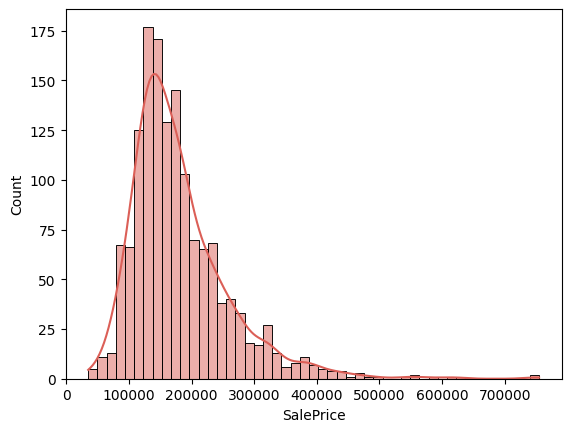

In [8]:
# let's look at the target 
_=sns.histplot(data=df, x="SalePrice", kde=True, color=sns.color_palette("hls", 9)[0])

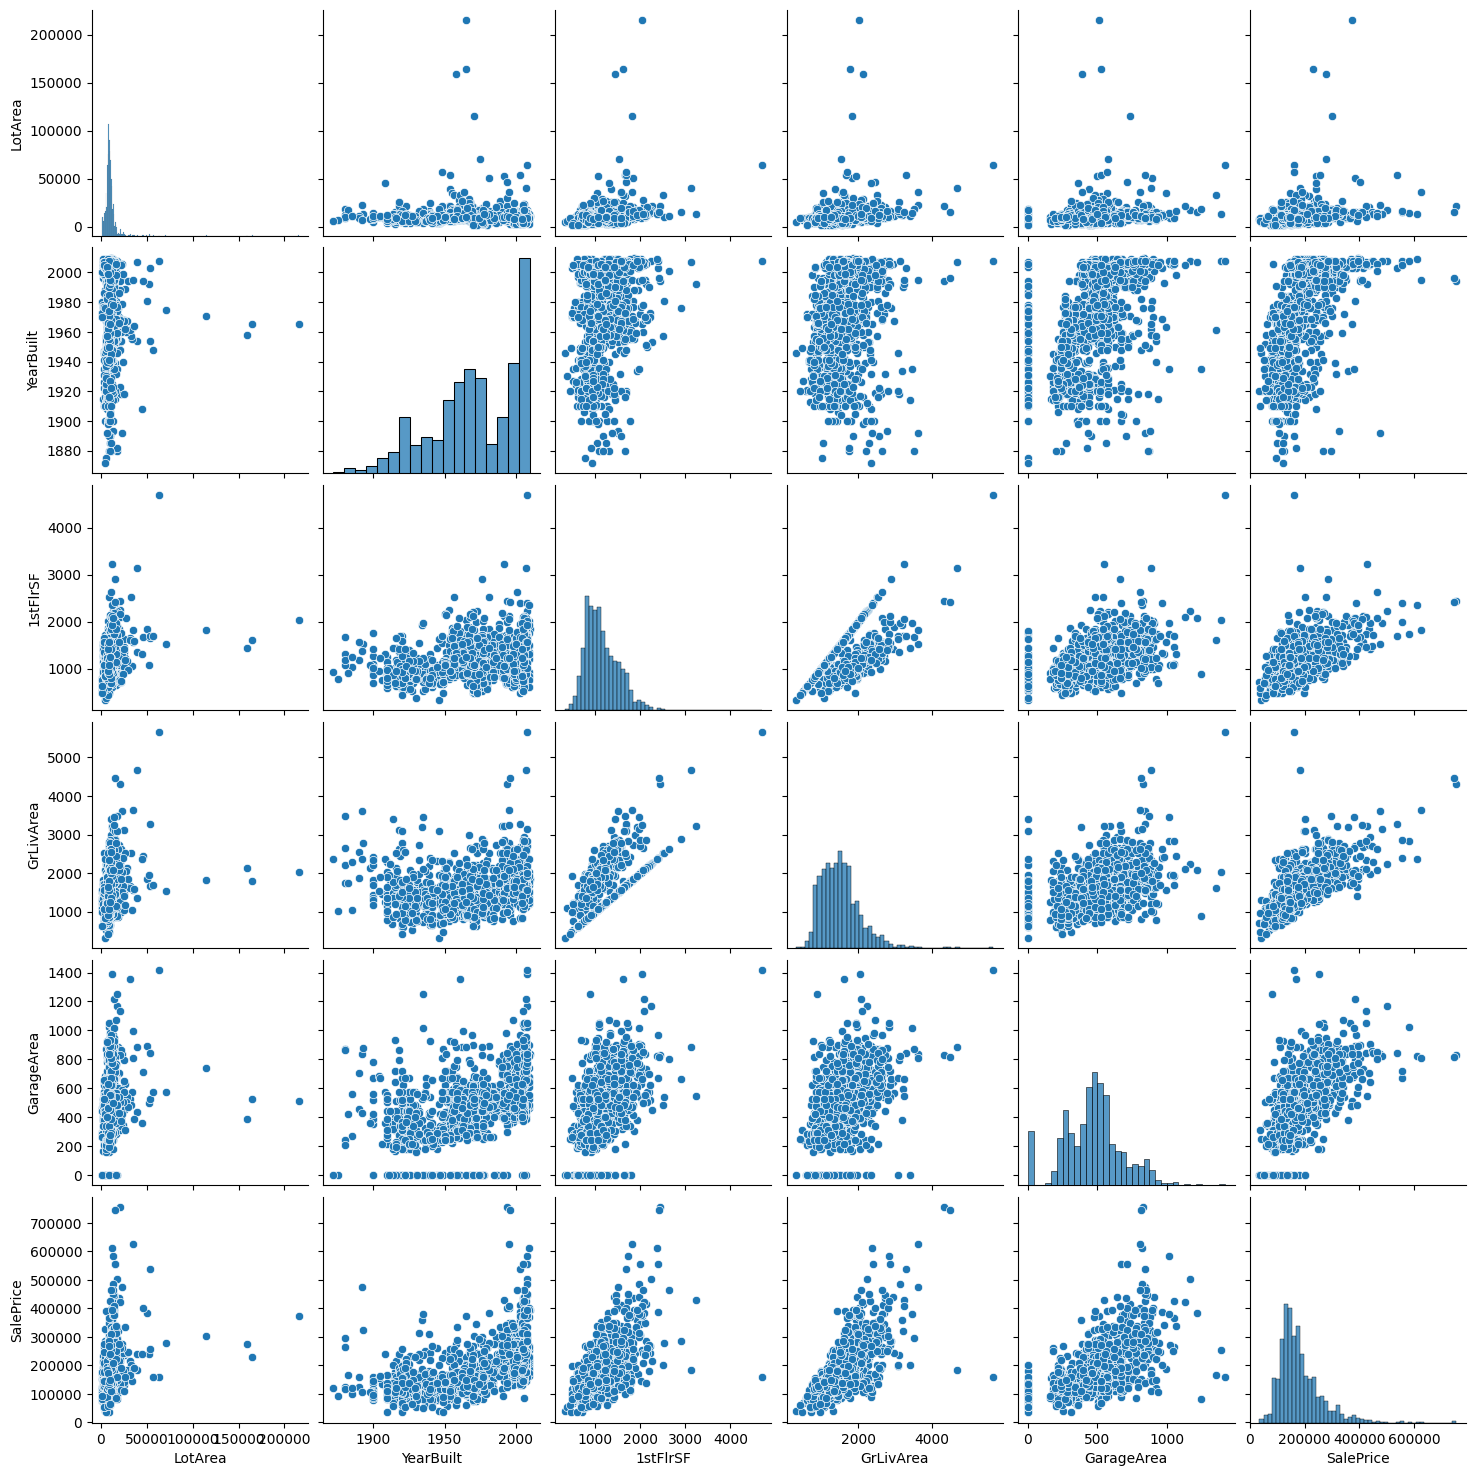

In [9]:
# a pairplot might be valuable
_=sns.pairplot(df)

In [10]:
df2 = df.dropna() # remove rows with missing values
print(f'Before {df.shape[0]} After {df2.shape[0]} removed {df.shape[0]-df2.shape[0]} Nans')

Before 1460 After 1460 removed 0 Nans


In [11]:
df_clean = df2[(df2-df2.mean()).abs() <= df2.std()*3].dropna() # remove outliers, remember the steps from the first lecture on regression, we're following a plan here

print(f'Before {df2.shape[0]} After {df_clean.shape[0]} removed {df2.shape[0]-df_clean.shape[0]} Outliers')

Before 1460 After 1405 removed 55 Outliers


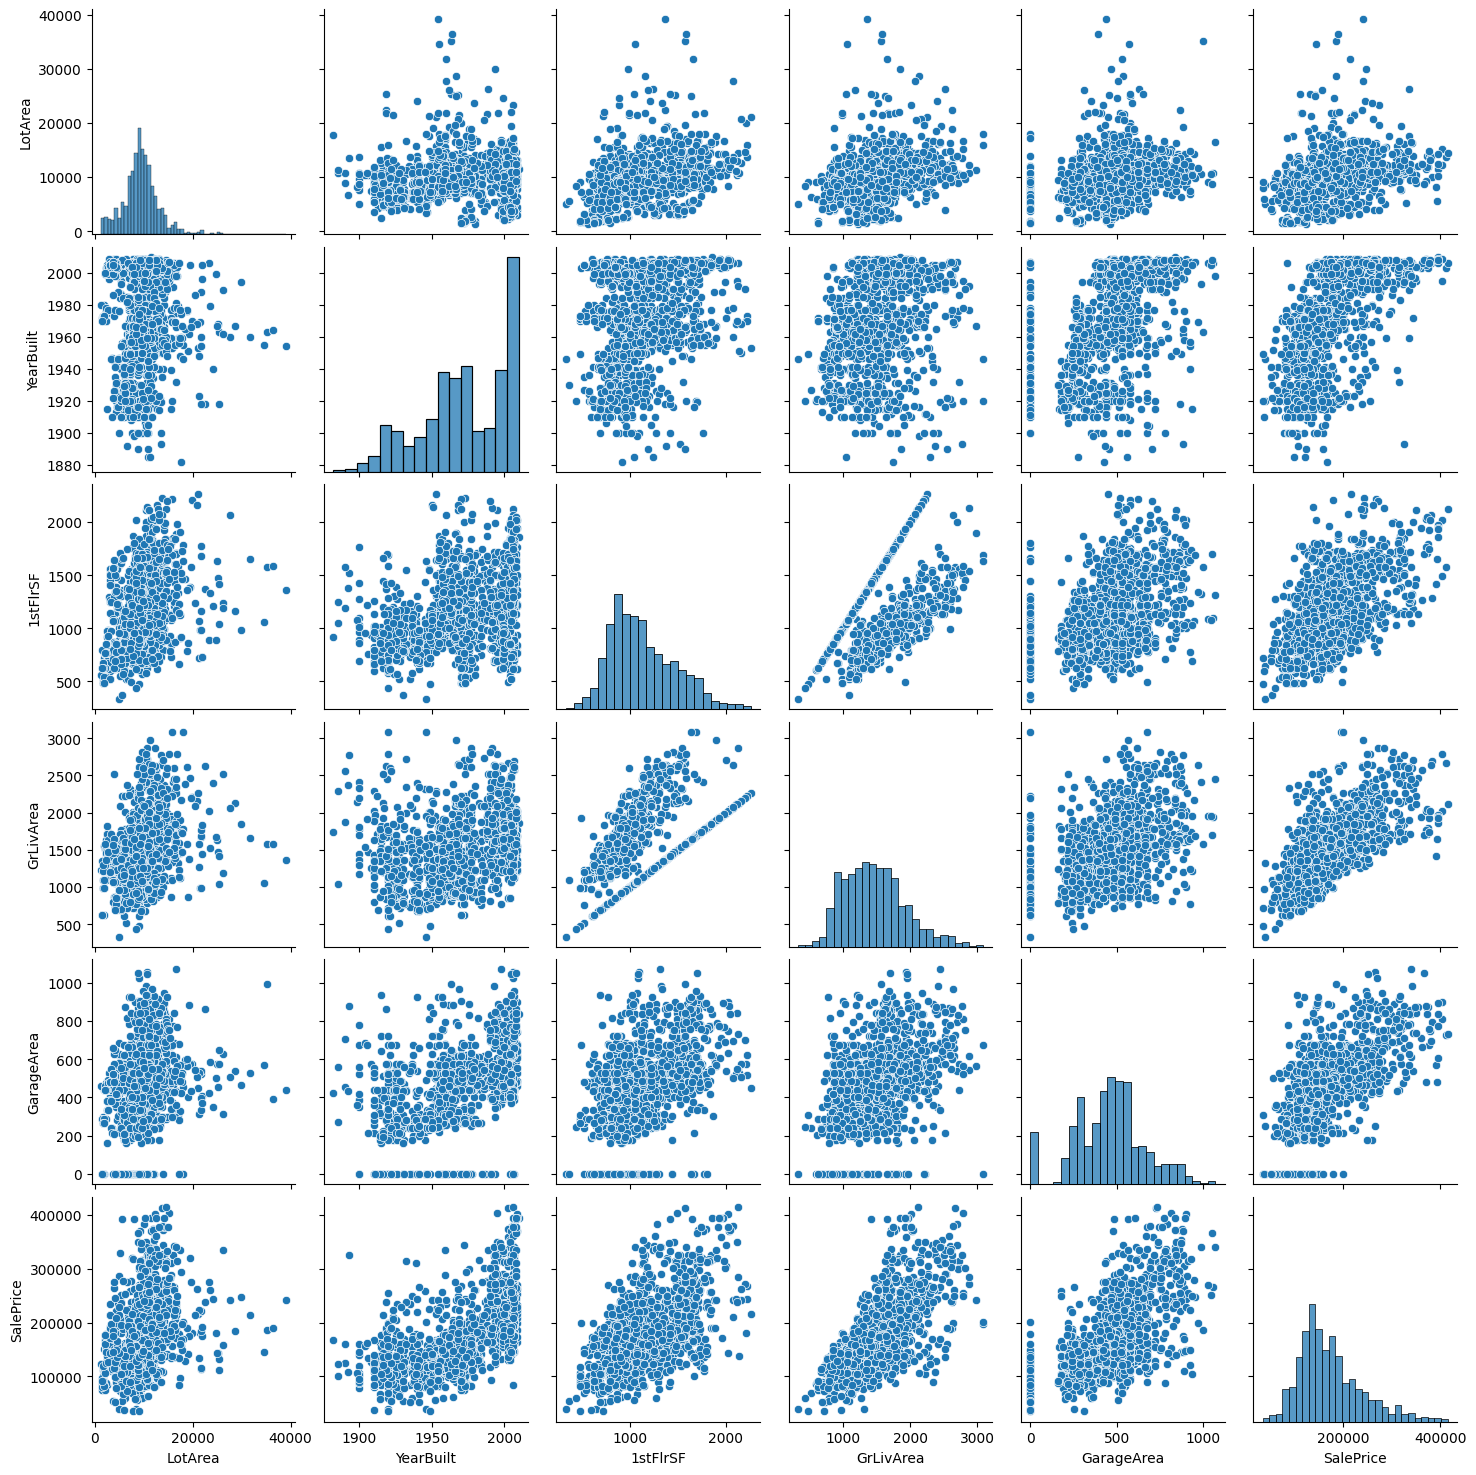

In [12]:
_=sns.pairplot(df_clean)

## Preparation

In [13]:
# Let's define a function to evalute a model

def eval_lm(name, lm, X_train, y_train, X_test, y_test):
    y_pred_lm_train = lm.predict(X_train)
    y_pred_lm_test = lm.predict(X_test)

    RMSE_lm_train = metrics.root_mean_squared_error(y_train, y_pred_lm_train)
    RMSE_lm_test = metrics.root_mean_squared_error(y_test, y_pred_lm_test) # use same scale as training data, so we can interpret the error better than the squared error

    r2_lm_train = lm.score(X_train, y_train)
    r2_lm_test = lm.score(X_test, y_test)
    print(f'{name}: RMSE(train) = {RMSE_lm_train:.4f}  RMSE(test) = {RMSE_lm_test:.4f}  r2(train)  = {r2_lm_train:.4f}  r2(test)  = {r2_lm_test:.4f}')

# Multiple Regression

Let's do very basic multiple regression first - no preprocessing of the data, no regularization. 

In [14]:
# Let's split the data into train and test dataset
target_name = "SalePrice"
test_size = 0.2
X, y = df_clean.drop(columns=target_name), df_clean[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
print("# train = %d, # test = %d, # total = %d" %(len(X_train), len(X_test), len(df_clean)))

# train = 1124, # test = 281, # total = 1405


In [15]:
blm = LinearRegression()
blm.fit(X_train, y_train)
eval_lm('blm', blm, X_train, y_train, X_test, y_test)

blm: RMSE(train) = 33462.9322  RMSE(test) = 30375.1120  r2(train)  = 0.7390  r2(test)  = 0.7849


Discussion: train and test scores are roughly similar, test is larger than train, this looks like underfitting.

# Polynomial Regression

**Exercise 1**: The given code trains polynomial models for degress 2, 3, 4, 5, 6, 7. Execute it and compare the results to the linear model and discuss. You will be getting very strange r2 values - what do you think is the reason for these values (think about it - if you understand r2, than you should be able to solve this without google!)?

In [16]:
for i in range(2,8):
    poly = PolynomialFeatures(i) # TODO: What happens here? # Why are we doing this?
    Xp = pd.DataFrame(poly.fit_transform(X))
    X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=test_size, random_state=42)
    plm = LinearRegression(solver='sag')
    plm.fit(X_train, y_train)
    eval_lm('plm_'+str(i), plm, X_train, y_train, X_test, y_test)

plm_2: RMSE(train) = 29778.3446  RMSE(test) = 25355.5765  r2(train)  = 0.7933  r2(test)  = 0.8501
plm_3: RMSE(train) = 28279.0530  RMSE(test) = 24531.6581  r2(train)  = 0.8136  r2(test)  = 0.8597
plm_4: RMSE(train) = 26938.9015  RMSE(test) = 30476.3448  r2(train)  = 0.8309  r2(test)  = 0.7834
plm_5: RMSE(train) = 23863.7101  RMSE(test) = 73056.3652  r2(train)  = 0.8673  r2(test)  = -0.2444
plm_6: RMSE(train) = 24464.0011  RMSE(test) = 161431.0356  r2(train)  = 0.8605  r2(test)  = -5.0762
plm_7: RMSE(train) = 21187.9421  RMSE(test) = 1056334.7611  r2(train)  = 0.8954  r2(test)  = -259.1743


In [ ]:
# Solution

# Regularization

For all of the following exercises, try different lambda/alpha values of 0.1, 0.5, 1, 10, 100 and increase the maximum number of iterations **max_iter** to 20000 and the tolerance **tol** to 0.1 for all the following regularization trials.

In [ ]:
alphas = [0.1, 0.5, 1, 10, 100]
max_iter=20000
tol=0.1

## Ridge Regression

**Exercise 2**: pick the most promising polynomial model (what is you decision criterion?) and try ridge regression (for the alphas given above, using the max_iter and tol from above). Interpret your result.

NOTE: You may be getting a warning (ill-conditioned matrix) - you can ignore this for now, it means that the feature values are to "broad" (high/low). This is a clear indication, that we need to normalize the features (which we will do below).

In [ ]:
# Solution

## Lasso Regression

**Exercise 3**: Try lasso regression and interpret your result.

In [ ]:
# Solution

## ElasticNet Regression

**Exercise 4**: Try ElasticNet regression and interpret your result. Play around with the l1_ratio parameter, which was called  \( l_1n \)   ) and interpret your results.

Note: actually, we should also vary the value for $l_1$_ratio (what we called rho in the lecture), which controls the strength of L1 vs. L2 regularization. Fell free to use GridSearchCV to try the alphas given above in combination with l1_ratios, if you are familiar with GridSearchCV.

\[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\]

where:
- \( 

In [ ]:
# Solution

# Feature Normalization

In the lecture, we discussed that ridge and lasso regression are not scale invariant, so it makes sense to normalize the features to the same range. 
We will return to this in a later exercise!

In [ ]:
# Solution

------